In [5]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=6, repr.plot.height=3)

library(maps)
library(ggmap)


 # maps v3.1: updated 'world': all lakes moved to separate new #
 # 'lakes' database. Type '?world' or 'news(package="maps")'.  #


Loading required package: ggplot2
Warning message:
: package ‘ggplot2’ was built under R version 3.2.4

https://d37djvu3ytnwxt.cloudfront.net/asset-v1:MITx+15.071x_3+1T2016+type@asset+block/murders.csv

In [3]:
murders = read.csv('data/murders.csv')
str(murders)

'data.frame':	51 obs. of  6 variables:
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Population       : int  4779736 710231 6392017 2915918 37253956 5029196 3574097 897934 601723 19687653 ...
 $ PopulationDensity: num  94.65 1.26 57.05 56.43 244.2 ...
 $ Murders          : int  199 31 352 130 1811 117 131 48 131 987 ...
 $ GunMurders       : int  135 19 232 93 1257 65 97 38 99 669 ...
 $ GunOwnership     : num  0.517 0.578 0.311 0.553 0.213 0.347 0.167 0.255 0.036 0.245 ...


In [6]:
statesMap = map_data("state")

In [7]:
str(statesMap)

'data.frame':	15537 obs. of  6 variables:
 $ long     : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat      : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ subregion: chr  NA NA NA NA ...


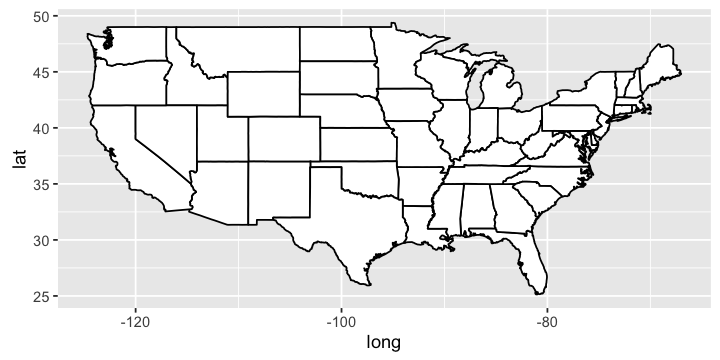

In [8]:
ggplot(statesMap, aes(x=long, y=lat, group=group)) + 
    geom_polygon(fill="white", color="black")

Matching parameter name state in murder data:

In [10]:
murders$region = tolower(murders$State)

## Join data / tables with merge function:

In [11]:
murderMap = merge(statesMap, murders, by="region")

In [12]:
str(murderMap)

'data.frame':	15537 obs. of  12 variables:
 $ region           : chr  "alabama" "alabama" "alabama" "alabama" ...
 $ long             : num  -87.5 -87.5 -87.5 -87.5 -87.6 ...
 $ lat              : num  30.4 30.4 30.4 30.3 30.3 ...
 $ group            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ subregion        : chr  NA NA NA NA ...
 $ State            : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Population       : int  4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 4779736 ...
 $ PopulationDensity: num  94.7 94.7 94.7 94.7 94.7 ...
 $ Murders          : int  199 199 199 199 199 199 199 199 199 199 ...
 $ GunMurders       : int  135 135 135 135 135 135 135 135 135 135 ...
 $ GunOwnership     : num  0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 0.517 ...


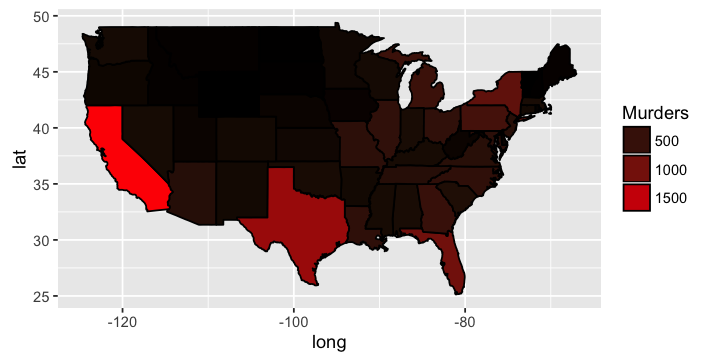

In [13]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=Murders)) + 
    geom_polygon(color="black") + 
    scale_fill_gradient(low="black", high="red", guide="legend")

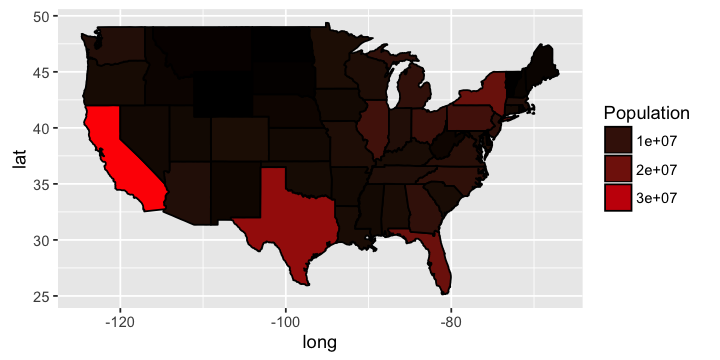

In [14]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=Population)) + 
    geom_polygon(color="black") + 
    scale_fill_gradient(low="black", high="red", guide="legend")

In [15]:
murderMap$MurderRate = murderMap$Murder / murderMap$Population * 100000

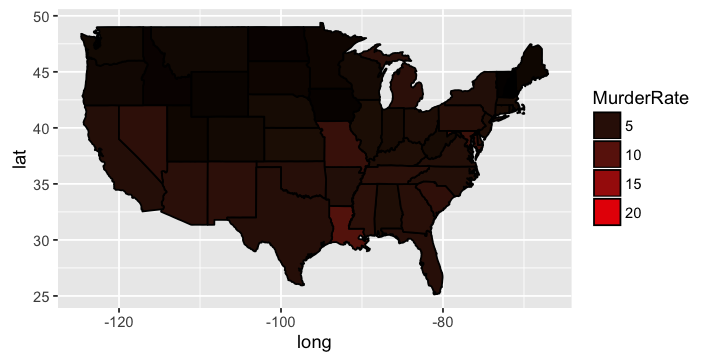

In [16]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=MurderRate)) + 
    geom_polygon(color="black") + 
    scale_fill_gradient(low="black", high="red", guide="legend")

There is a small area with very high value, so we could not see it on map.

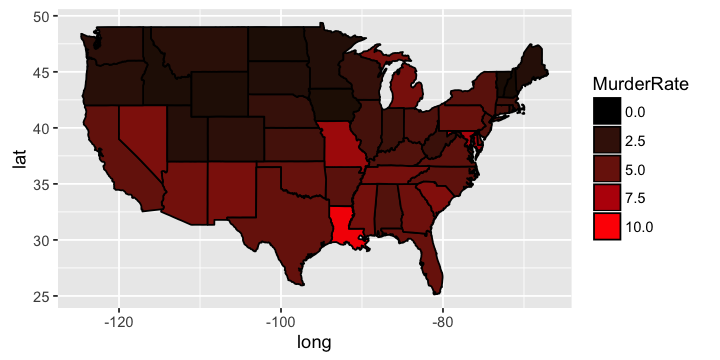

In [17]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=MurderRate)) + 
    geom_polygon(color="black") + 
    scale_fill_gradient(low="black", high="red", guide="legend",
                       limits=c(0,10))

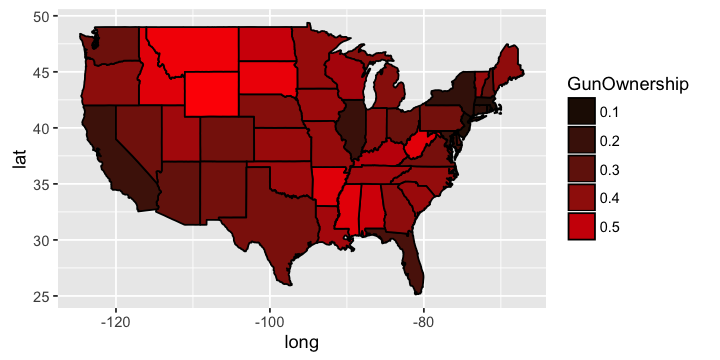

In [19]:
ggplot(murderMap, aes(x=long, y=lat, group=group, fill=GunOwnership)) + 
    geom_polygon(color="black") + 
    scale_fill_gradient(low="black", high="red", guide="legend")